<a href="https://colab.research.google.com/github/fanfbryn/Analisis-Sentimen-K22/blob/main/Sentiment_Analysis_Kurikulum_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from datetime import datetime, date

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataK22(1).csv to DataK22(1).csv


In [ ]:
data=pd.read_csv('DataK22(1).csv')
data

,Unnamed: 0,Unnamed: 0.1,index,waktu,id,username,text
0,0,0,0,2021-12-23 23:58:33,1474167577655930882,cas-e ):) 🦥,brt schfess sch salam dari aku yg udah pake ku...
1,6,6,6,2021-12-23 23:28:56,1474160124277059587,saya Indonesia,brt junedya77 ini bagus banget karena akan men...
2,11,11,11,2021-12-23 23:25:10,1474159176565682186,June 🇮🇩,bini bagus banget karena akan menimbulkan rasa...
3,12,12,12,2021-12-23 23:24:05,1474158901268344854,vladimilputhan,bseperti utbksbmptnnndari sisi lain pro dan ko...
4,13,13,13,2021-12-23 23:22:59,1474158626931572737,din,bhaedhi dari aku yg kerja di lingk pendidikan ...
...,...,...,...,...,...,...,...
224,996,996,996,2021-12-21 4:02:42,1473141853776007168,Keadilan utk korban KS ✊,bkalau aku sih yes ramai soal kurikulum 2022 s...
225,997,997,997,2021-12-21 3:00:39,1473126239468613632,Radar Cirebon,bkementerian pendidikan kebudayaan riset dan t...
226,998,998,998,2021-12-21 1:36:06,1473104961663762436,Harian Jogja,bkurikulum baru 2022 kelas x smk sudah bisa ik...
227,1002,1002,1002,2021-12-21 1:22:05,1473101432249221123,nisa faridz,bramai soal kurikulum 2022 sma tidak ada jurus...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataK22(1).xlsx to DataK22(1).xlsx


In [ ]:
data_en = pd.read_excel('DataK22(1).xlsx')
data_en

,Unnamed: 0,text
0,0,brt schfess sch salam dari aku yg udah pake ku...
1,1,brt junedya77 ini bagus banget karena akan men...
2,2,bini bagus banget karena akan menimbulkan rasa...
3,3,bseperti utbksbmptnnndari sisi lain pro dan ko...
4,4,bhaedhi dari aku yg kerja di lingk pendidikan ...
...,...,...
224,224,bkalau aku sih yes ramai soal kurikulum 2022 s...
225,225,bkementerian pendidikan kebudayaan riset dan t...
226,226,bkurikulum baru 2022 kelas x smk sudah bisa ik...
227,227,bramai soal kurikulum 2022 sma tidak ada jurus...


In [ ]:
df = data.copy()

In [ ]:
df['text_en']= data_en.iloc[:,1]
df

,Unnamed: 0,Unnamed: 0.1,index,waktu,id,username,text,text_en
0,0,0,0,2021-12-23 23:58:33,1474167577655930882,cas-e ):) 🦥,brt schfess sch salam dari aku yg udah pake ku...,brt schfess sch salam dari aku yg udah pake ku...
1,6,6,6,2021-12-23 23:28:56,1474160124277059587,saya Indonesia,brt junedya77 ini bagus banget karena akan men...,brt junedya77 ini bagus banget karena akan men...
2,11,11,11,2021-12-23 23:25:10,1474159176565682186,June 🇮🇩,bini bagus banget karena akan menimbulkan rasa...,bini bagus banget karena akan menimbulkan rasa...
3,12,12,12,2021-12-23 23:24:05,1474158901268344854,vladimilputhan,bseperti utbksbmptnnndari sisi lain pro dan ko...,bseperti utbksbmptnnndari sisi lain pro dan ko...
4,13,13,13,2021-12-23 23:22:59,1474158626931572737,din,bhaedhi dari aku yg kerja di lingk pendidikan ...,bhaedhi dari aku yg kerja di lingk pendidikan ...
...,...,...,...,...,...,...,...,...
224,996,996,996,2021-12-21 4:02:42,1473141853776007168,Keadilan utk korban KS ✊,bkalau aku sih yes ramai soal kurikulum 2022 s...,bkalau aku sih yes ramai soal kurikulum 2022 s...
225,997,997,997,2021-12-21 3:00:39,1473126239468613632,Radar Cirebon,bkementerian pendidikan kebudayaan riset dan t...,bkementerian pendidikan kebudayaan riset dan t...
226,998,998,998,2021-12-21 1:36:06,1473104961663762436,Harian Jogja,bkurikulum baru 2022 kelas x smk sudah bisa ik...,bkurikulum baru 2022 kelas x smk sudah bisa ik...
227,1002,1002,1002,2021-12-21 1:22:05,1473101432249221123,nisa faridz,bramai soal kurikulum 2022 sma tidak ada jurus...,bramai soal kurikulum 2022 sma tidak ada jurus...


In [ ]:
from textblob import TextBlob


In [ ]:
# Create a function to get the subjectivity 
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

# Create a function to get the polarity 
def getPolarity(text): 
    return TextBlob(text).sentiment.polarity  


In [ ]:
#Create two new columns 
df['Subjectivity'] = df['text_en'].apply(getSubjectivity) 
df['Polarity'] = df['text_en'].apply(getPolarity) 

#Show the new dataframe with the new columns 
df 

,Unnamed: 0,Unnamed: 0.1,index,waktu,id,username,text,text_en,Subjectivity,Polarity
0,0,0,0,2021-12-23 23:58:33,1474167577655930882,cas-e ):) 🦥,brt schfess sch salam dari aku yg udah pake ku...,brt schfess sch salam dari aku yg udah pake ku...,0.0,0.0
1,6,6,6,2021-12-23 23:28:56,1474160124277059587,saya Indonesia,brt junedya77 ini bagus banget karena akan men...,brt junedya77 ini bagus banget karena akan men...,0.0,0.0
2,11,11,11,2021-12-23 23:25:10,1474159176565682186,June 🇮🇩,bini bagus banget karena akan menimbulkan rasa...,bini bagus banget karena akan menimbulkan rasa...,0.0,0.0
3,12,12,12,2021-12-23 23:24:05,1474158901268344854,vladimilputhan,bseperti utbksbmptnnndari sisi lain pro dan ko...,bseperti utbksbmptnnndari sisi lain pro dan ko...,0.0,0.0
4,13,13,13,2021-12-23 23:22:59,1474158626931572737,din,bhaedhi dari aku yg kerja di lingk pendidikan ...,bhaedhi dari aku yg kerja di lingk pendidikan ...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
224,996,996,996,2021-12-21 4:02:42,1473141853776007168,Keadilan utk korban KS ✊,bkalau aku sih yes ramai soal kurikulum 2022 s...,bkalau aku sih yes ramai soal kurikulum 2022 s...,0.0,0.0
225,997,997,997,2021-12-21 3:00:39,1473126239468613632,Radar Cirebon,bkementerian pendidikan kebudayaan riset dan t...,bkementerian pendidikan kebudayaan riset dan t...,0.0,0.0
226,998,998,998,2021-12-21 1:36:06,1473104961663762436,Harian Jogja,bkurikulum baru 2022 kelas x smk sudah bisa ik...,bkurikulum baru 2022 kelas x smk sudah bisa ik...,0.0,0.0
227,1002,1002,1002,2021-12-21 1:22:05,1473101432249221123,nisa faridz,bramai soal kurikulum 2022 sma tidak ada jurus...,bramai soal kurikulum 2022 sma tidak ada jurus...,0.0,0.0


In [ ]:
#Create function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score): 
    if score < 0: 
        return 'Negative' 
    elif score > 0: 
        return 'Positive' 
    else:
        return 'Netral'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis) 

#Show the dataframe 
df 

,Unnamed: 0,Unnamed: 0.1,index,waktu,id,username,text,text_en,Subjectivity,Polarity,Analysis
0,0,0,0,2021-12-23 23:58:33,1474167577655930882,cas-e ):) 🦥,brt schfess sch salam dari aku yg udah pake ku...,brt schfess sch salam dari aku yg udah pake ku...,0.0,0.0,Netral
1,6,6,6,2021-12-23 23:28:56,1474160124277059587,saya Indonesia,brt junedya77 ini bagus banget karena akan men...,brt junedya77 ini bagus banget karena akan men...,0.0,0.0,Netral
2,11,11,11,2021-12-23 23:25:10,1474159176565682186,June 🇮🇩,bini bagus banget karena akan menimbulkan rasa...,bini bagus banget karena akan menimbulkan rasa...,0.0,0.0,Netral
3,12,12,12,2021-12-23 23:24:05,1474158901268344854,vladimilputhan,bseperti utbksbmptnnndari sisi lain pro dan ko...,bseperti utbksbmptnnndari sisi lain pro dan ko...,0.0,0.0,Netral
4,13,13,13,2021-12-23 23:22:59,1474158626931572737,din,bhaedhi dari aku yg kerja di lingk pendidikan ...,bhaedhi dari aku yg kerja di lingk pendidikan ...,0.0,0.0,Netral
...,...,...,...,...,...,...,...,...,...,...,...
224,996,996,996,2021-12-21 4:02:42,1473141853776007168,Keadilan utk korban KS ✊,bkalau aku sih yes ramai soal kurikulum 2022 s...,bkalau aku sih yes ramai soal kurikulum 2022 s...,0.0,0.0,Netral
225,997,997,997,2021-12-21 3:00:39,1473126239468613632,Radar Cirebon,bkementerian pendidikan kebudayaan riset dan t...,bkementerian pendidikan kebudayaan riset dan t...,0.0,0.0,Netral
226,998,998,998,2021-12-21 1:36:06,1473104961663762436,Harian Jogja,bkurikulum baru 2022 kelas x smk sudah bisa ik...,bkurikulum baru 2022 kelas x smk sudah bisa ik...,0.0,0.0,Netral
227,1002,1002,1002,2021-12-21 1:22:05,1473101432249221123,nisa faridz,bramai soal kurikulum 2022 sma tidak ada jurus...,bramai soal kurikulum 2022 sma tidak ada jurus...,0.0,0.0,Netral


In [ ]:
from wordcloud import WordCloud

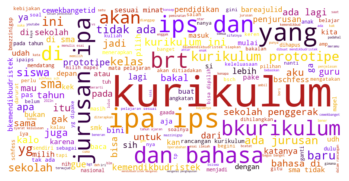

In [ ]:
#word cloud visualization
allWords = ' '.join([twts for twts in df['text_en']])
wordCloud = WordCloud(width=900, height=450, background_color='white', colormap='gnuplot', random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

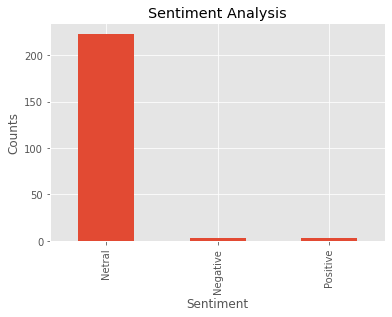

In [ ]:
df['Analysis'].value_counts() 

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment') 
plt.ylabel('Counts') 
df['Analysis'].value_counts().plot(kind='bar') 
plt.show()

In [ ]:
df['Analysis'].value_counts() 

Netral      223
Negative      3
Positive      3
Name: Analysis, dtype: int64